In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier,export_text
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import warnings

- Datasets downloaded from : https://archive.ics.uci.edu/

`labelencoder`: SKlearn wont convert/understand the object/string data for prediction process ... its required to convert into numerical data.. labelEncoder will convert one object at a time .
Usage: Typically used for target variables in classification problems.

`OrdinalEncoder` : Where as in OrdinalEncoder , convers more than one features at time into numerical data.
Usage: Used for feature variables where the categories have a meaningful order.


In [3]:
warnings.filterwarnings(action='ignore')

In [4]:
mushroom = pd.read_csv("/Users/DRepani/Documents/AIML/Datasets/mushrooms.csv")
mushroom.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


- if you observe the above dataset, all are in object data.

In [5]:
mushroom.shape

(8124, 23)

In [6]:
mushroom.isna().sum()

type                        0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# verification on type:

mushroom.type.value_counts(normalize=True)

type
e    0.517971
p    0.482029
Name: proportion, dtype: float64

- eatable mushrooms : 52%
- poison mushrooms : 48%

- Here type is a dependent/target variable 
- remaining variable/objects are the features .

In [8]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

- If you observe above dataset all are in categorical data 

### Split the data for X and y

In [9]:
X = mushroom.iloc[:, 1:] # required all the rows and except the first column 
y = mushroom['type']
X.shape, y.shape

((8124, 22), (8124,))

### Splitting data for training and testing.

In [10]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=25, test_size=1000)
X_train.shape, X_test.shape

((7124, 22), (1000, 22))

- X is completely categorical data - before applying algorithm on X better convert all data in X into numerical data.
- We have to convert all 22 columns into encoding 

- Dont go with labelencoder (its convert one feature at a time) instead will go with ordinal encoder.

- Whenever you doing above X will converts into numpy array 

In [11]:
encoding = OrdinalEncoder()
X = pd.DataFrame(encoding.fit_transform(X), columns=X.columns)

In [12]:
X

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 8124 non-null   float64
 1   cap_surface               8124 non-null   float64
 2   cap_color                 8124 non-null   float64
 3   bruises                   8124 non-null   float64
 4   odor                      8124 non-null   float64
 5   gill_attachment           8124 non-null   float64
 6   gill_spacing              8124 non-null   float64
 7   gill_size                 8124 non-null   float64
 8   gill_color                8124 non-null   float64
 9   stalk_shape               8124 non-null   float64
 10  stalk_root                8124 non-null   float64
 11  stalk_surface_above_ring  8124 non-null   float64
 12  stalk_surface_below_ring  8124 non-null   float64
 13  stalk_color_above_ring    8124 non-null   float64
 14  stalk_co

In [14]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=25, test_size=1000)
X_train.shape, X_test.shape

((7124, 22), (1000, 22))

In [15]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 1.0)

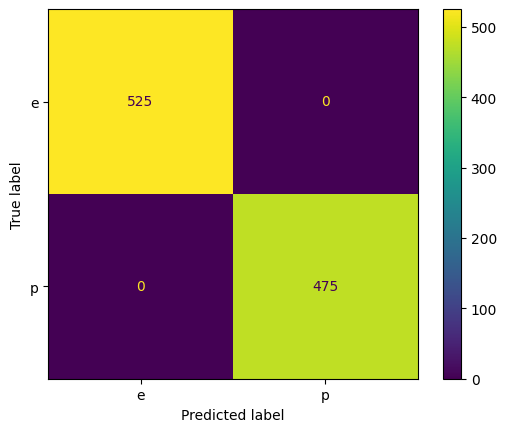

In [16]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [17]:
model.get_depth(), model.get_n_leaves()

(7, 13)

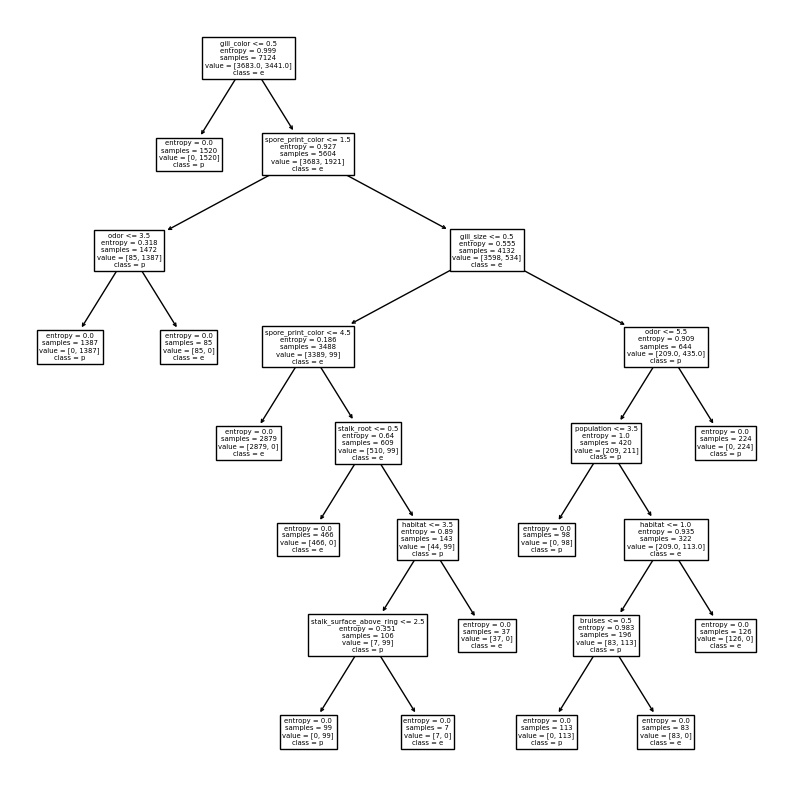

In [18]:
plt.figure(figsize=(10,10))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

### finding features importance on model:

In [19]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.02706839, 0.08910886,
       0.        , 0.        , 0.14885711, 0.26981456, 0.        ,
       0.03690114, 0.00522639, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.3784248 ,
       0.01671186, 0.0278869 ])

In [20]:
X.columns[model.feature_importances_>0.1]

Index(['gill_size', 'gill_color', 'spore_print_color'], dtype='object')

- If you observe , `spore_print_color` field having most impartant value. 

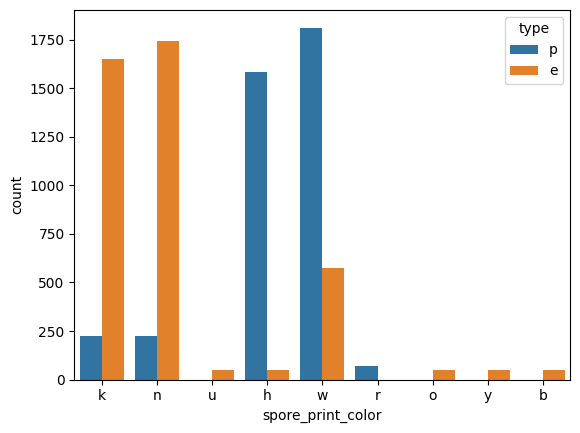

In [21]:
sns.countplot(data=mushroom, x="spore_print_color", hue='type')
plt.show()

- Now we can take only the columns which are important for feature selectio. as per above `'gill_size', 'gill_color', 'spore_print_color'` will use for X independed/features variable

In [32]:
X = mushroom[['gill_size', 'gill_color', 'spore_print_color', 'stalk_root']]
y = mushroom['type']

In [33]:
encoding = OrdinalEncoder()
X = pd.DataFrame(encoding.fit_transform(X), columns=X.columns)

In [24]:
X

,gill_size,gill_color,spore_print_color
0,1.0,4.0,2.0
1,0.0,4.0,3.0
2,0.0,5.0,3.0
3,1.0,5.0,2.0
4,0.0,4.0,3.0
...,...,...,...
8119,0.0,11.0,0.0
8120,0.0,11.0,0.0
8121,0.0,5.0,0.0
8122,1.0,0.0,7.0


In [34]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=25, test_size=1000)
X_train.shape, X_test.shape

((7124, 4), (1000, 4))

In [36]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9856822010106682, 0.99)

- Training score: 97% and testing score: 97%

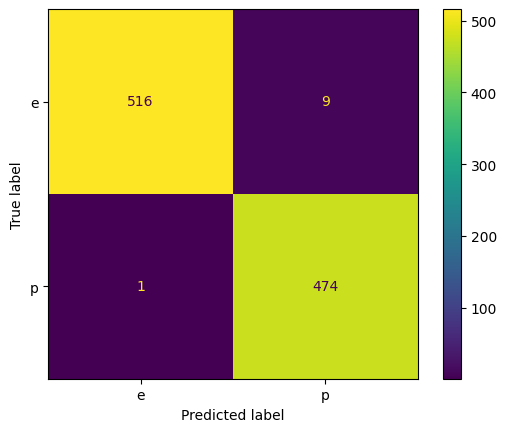

In [37]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [38]:
X = mushroom[['gill_size', 'gill_color', 'spore_print_color', 'stalk_root', 'odor']]
y = mushroom['type']

In [39]:
encoding = OrdinalEncoder()
X = pd.DataFrame(encoding.fit_transform(X), columns=X.columns)

In [40]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=25, test_size=1000)
X_train.shape, X_test.shape

((7124, 5), (1000, 5))

In [41]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9990174059517125, 0.999)

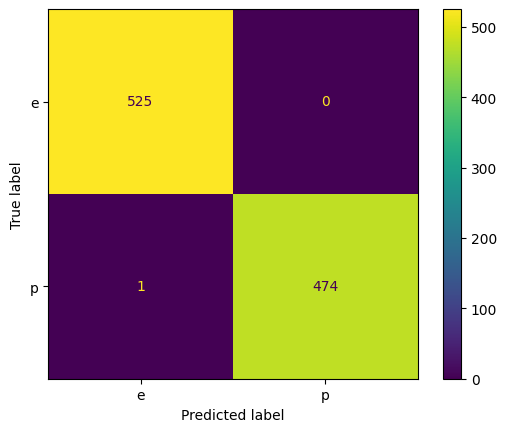

In [42]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

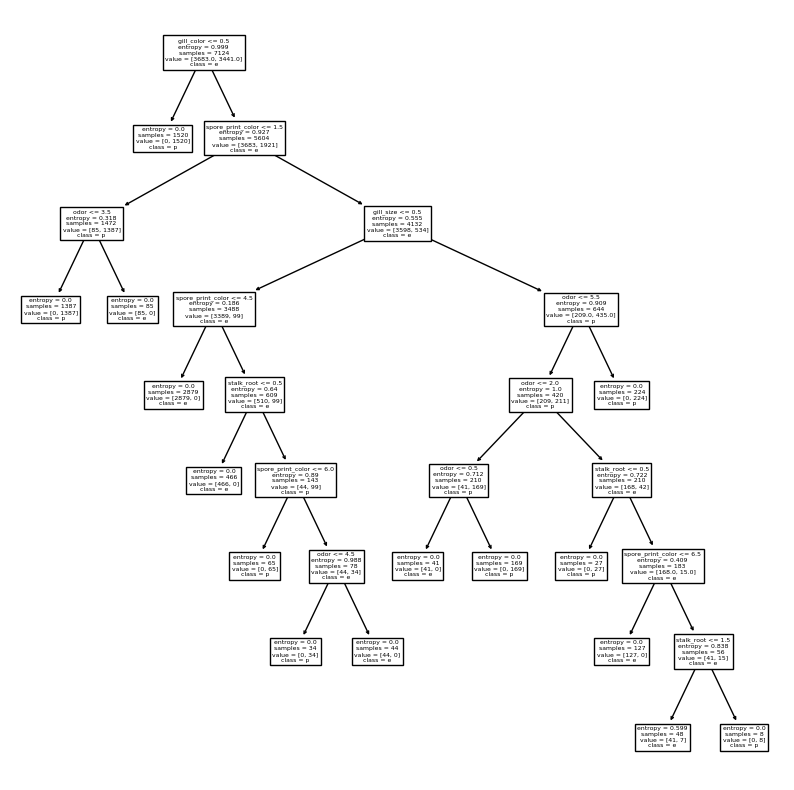

In [43]:
plt.figure(figsize=(10,10))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

In [51]:
model.get_n_leaves(), model.get_depth(),model.feature_importances_

(15, 8, array([0.14946115, 0.27090941, 0.39098815, 0.05044096, 0.13820033]))

In [52]:
result = export_text(model, feature_names=X.columns, show_weights=True, decimals=3)
print(result)

|--- gill_color <= 0.500
|   |--- weights: [0.000, 1520.000] class: p
|--- gill_color >  0.500
|   |--- spore_print_color <= 1.500
|   |   |--- odor <= 3.500
|   |   |   |--- weights: [0.000, 1387.000] class: p
|   |   |--- odor >  3.500
|   |   |   |--- weights: [85.000, 0.000] class: e
|   |--- spore_print_color >  1.500
|   |   |--- gill_size <= 0.500
|   |   |   |--- spore_print_color <= 4.500
|   |   |   |   |--- weights: [2879.000, 0.000] class: e
|   |   |   |--- spore_print_color >  4.500
|   |   |   |   |--- stalk_root <= 0.500
|   |   |   |   |   |--- weights: [466.000, 0.000] class: e
|   |   |   |   |--- stalk_root >  0.500
|   |   |   |   |   |--- spore_print_color <= 6.000
|   |   |   |   |   |   |--- weights: [0.000, 65.000] class: p
|   |   |   |   |   |--- spore_print_color >  6.000
|   |   |   |   |   |   |--- odor <= 4.500
|   |   |   |   |   |   |   |--- weights: [0.000, 34.000] class: p
|   |   |   |   |   |   |--- odor >  4.500
|   |   |   |   |   |   |   |--- wei